## Step 3: Training & Prediction AutoArima

In [1]:
%store -r df_aggregated

In [2]:
import pandas as pd

df = df_aggregated
df = df.reset_index(drop=True)

### Conversion of Columns

In [3]:
from sklearn.preprocessing import OneHotEncoder

# Function to one-hot encode a column
def one_hot_encode(df, column):
    encoder = OneHotEncoder(sparse_output=False)
    encoded = encoder.fit_transform(df[[column]])
    encoded_df = pd.DataFrame(encoded, index=df.index)
    encoded_df.columns = [f'{column}_{i}' for i in range(encoded.shape[1])]
    return encoded_df

# Convert Datetime to pandas datetime object and set as index
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime', inplace=True)

df['Holiday'] = df['Holiday'].astype(int)

# Drop the unnecessary columns
df.drop(['Hour_Category', 'Weekday'], axis=1, inplace=True)

df['DayOfWeek'] = df.index.dayofweek

# One-hot encode 'Hour_Category' and 'Holiday' columns and concatenate with the original dataframe
df = pd.concat([
    df,
    one_hot_encode(df, 'Holiday')
], axis=1)

# Drop the unnecessary columns
df.drop(['Holiday'], axis=1, inplace=True)

print(df)

                     Hour  Cluster  TotalPickups  Month  IsWeekend  DayOfWeek  \
Datetime                                                                        
2014-04-01 00:00:00     0        0          12.0      4          0          1   
2014-04-01 00:00:00     0        1           7.0      4          0          1   
2014-04-01 00:00:00     0        2           6.0      4          0          1   
2014-04-01 00:00:00     0        3           0.0      4          0          1   
2014-04-01 00:00:00     0        4           1.0      4          0          1   
...                   ...      ...           ...    ...        ...        ...   
2014-09-30 23:00:00    23        5           0.0      9          0          1   
2014-09-30 23:00:00    23        6           0.0      9          0          1   
2014-09-30 23:00:00    23        7           0.0      9          0          1   
2014-09-30 23:00:00    23        8           0.0      9          0          1   
2014-09-30 23:00:00    23   

### Creation of October Data

In [4]:
import holidays

# Using US holidays for 2014
us_holidays = holidays.US(years=2014)
holidays_list = list(us_holidays.keys())

# Define the range of dates for October 2014
october_dates = pd.date_range(start='2014-10-01', end='2014-10-31 23:00:00', freq='H')

# Create a DataFrame for each cluster
october_dfs = []
for cluster in range(10):
    df_october = pd.DataFrame(index=october_dates)
    df_october['Cluster'] = cluster
    df_october['Hour'] = df_october.index.hour
    df_october['Month'] = df_october.index.month
    df_october['IsWeekend'] = (df_october.index.dayofweek >= 5).astype(int)
    df_october['DayOfWeek'] = df_october.index.dayofweek
    df_october['Holiday'] = df_october.index.isin(holidays_list).astype(int)
    df_october['TotalPickups'] = 0
    
    october_dfs.append(df_october)
    
# Concatenate all DataFrames to create a final dataset
df_october = pd.concat(october_dfs)

# One-hot encode 'Hour_Category' and 'Holiday' columns and concatenate with the original dataframe
df_october = pd.concat([
    df_october,
    one_hot_encode(df_october, 'Holiday')
], axis=1)

# Drop the unnecessary columns
df_october.drop(['Holiday'], axis=1, inplace=True)

print(df_october)

                     Cluster  Hour  Month  IsWeekend  DayOfWeek  TotalPickups  \
2014-10-01 00:00:00        0     0     10          0          2             0   
2014-10-01 01:00:00        0     1     10          0          2             0   
2014-10-01 02:00:00        0     2     10          0          2             0   
2014-10-01 03:00:00        0     3     10          0          2             0   
2014-10-01 04:00:00        0     4     10          0          2             0   
...                      ...   ...    ...        ...        ...           ...   
2014-10-31 19:00:00        9    19     10          0          4             0   
2014-10-31 20:00:00        9    20     10          0          4             0   
2014-10-31 21:00:00        9    21     10          0          4             0   
2014-10-31 22:00:00        9    22     10          0          4             0   
2014-10-31 23:00:00        9    23     10          0          4             0   

                     Holida

### AutoArima Training

Processing cluster 0...
Mean Absolute Error for cluster 0: 39.93841551094565
RMSE for cluster 0: 61.197870099427185
R2 for cluster 0: 0.45483081169110373


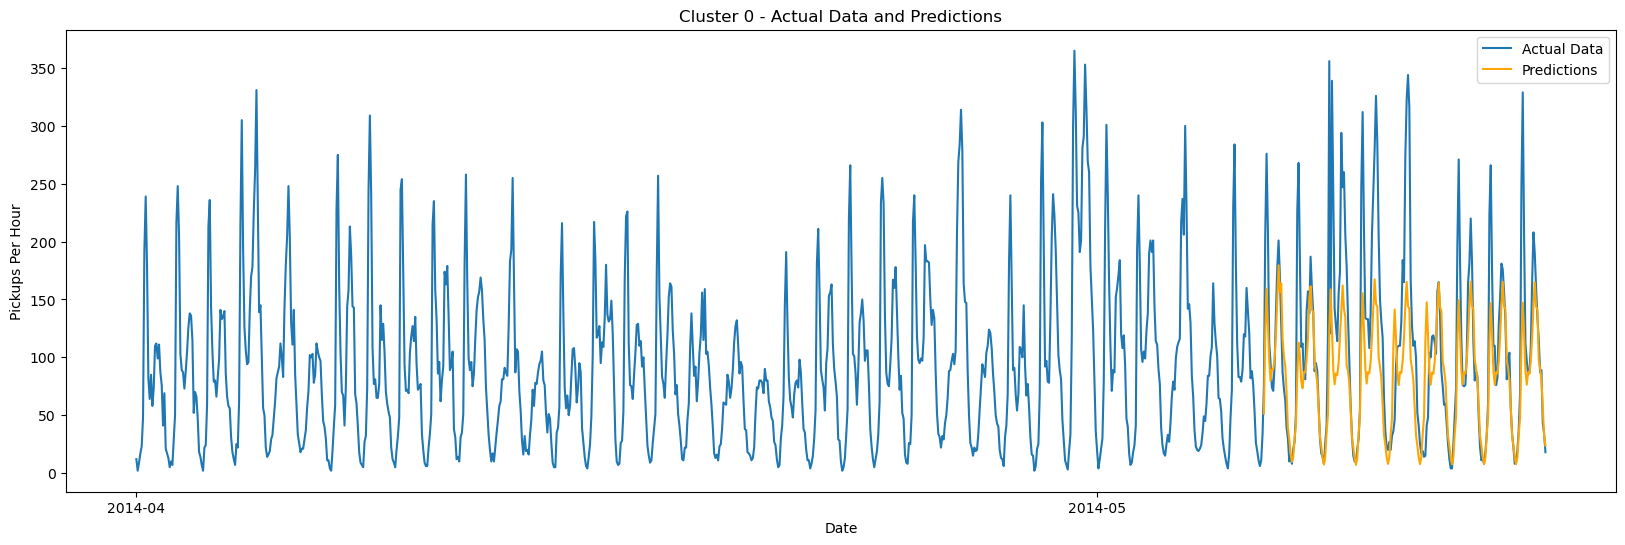

Processing cluster 1...
Mean Absolute Error for cluster 1: 7.518510957400463
RMSE for cluster 1: 11.267321262610116
R2 for cluster 1: 0.4816181443659645


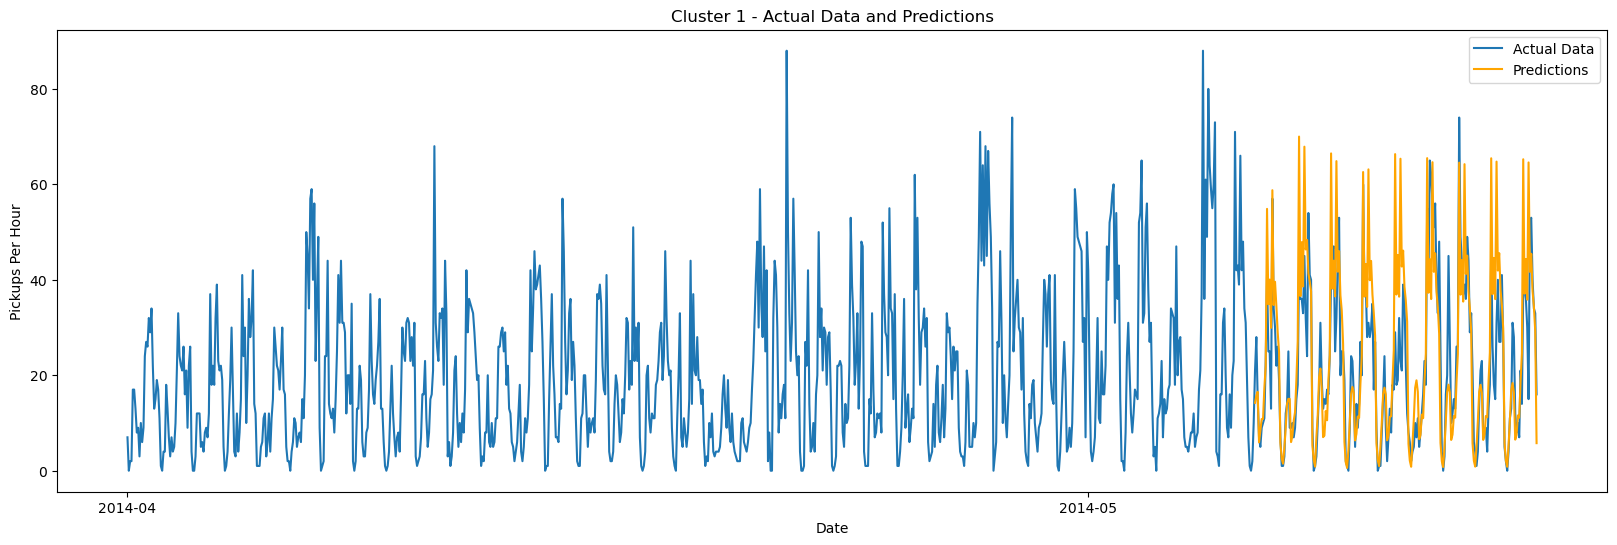

Processing cluster 2...
Mean Absolute Error for cluster 2: 16.041610800334364
RMSE for cluster 2: 24.48822291986065
R2 for cluster 2: 0.24725297297914794


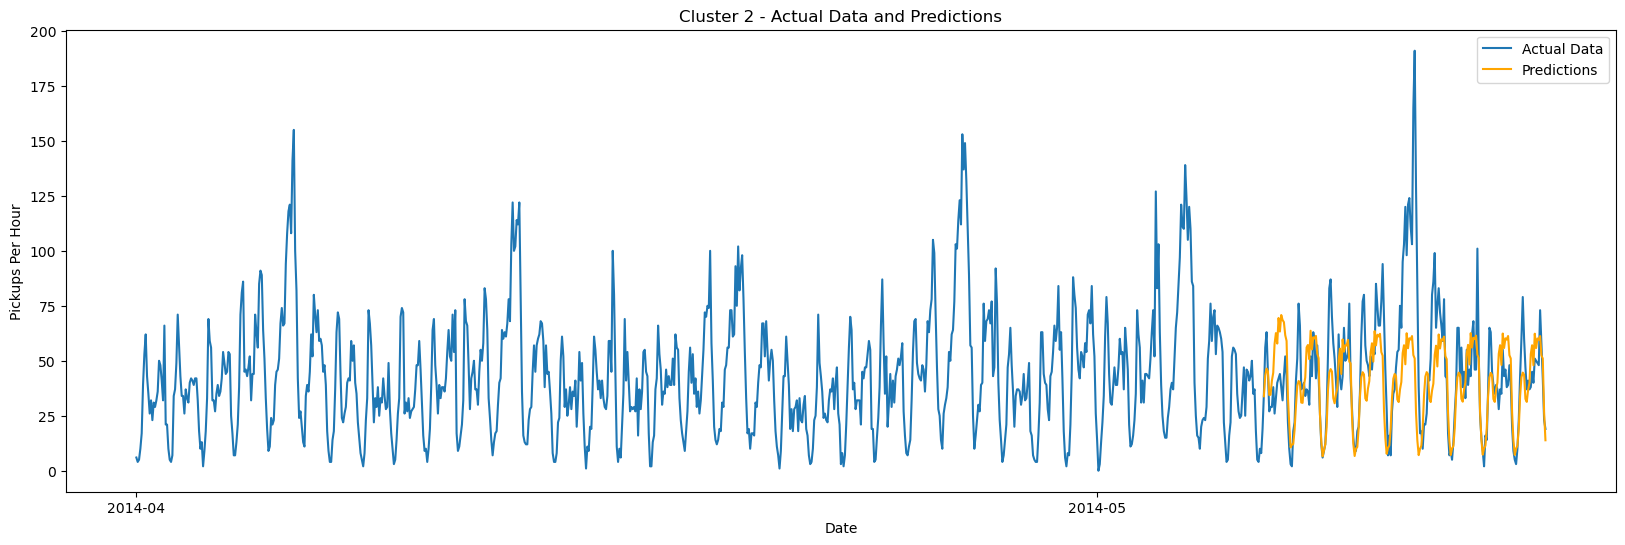

Processing cluster 3...
Mean Absolute Error for cluster 3: 3.148546101241481
RMSE for cluster 3: 4.103635139867432
R2 for cluster 3: 0.3209388783513544


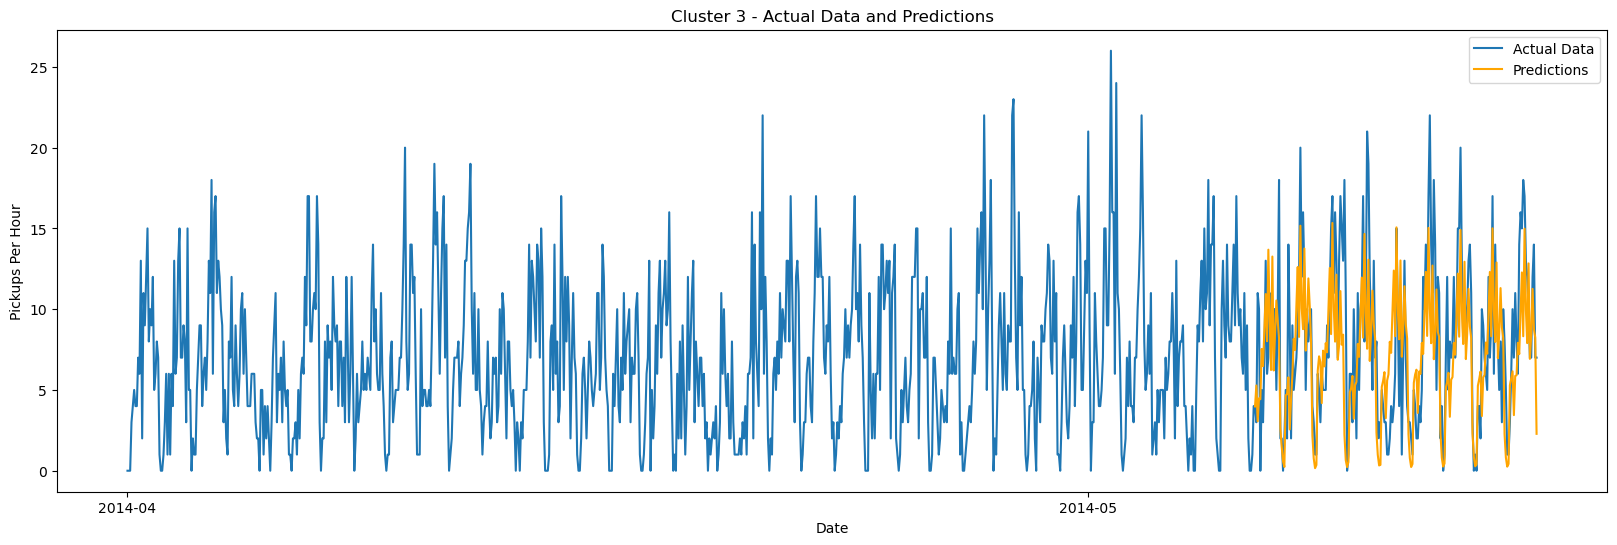

Processing cluster 4...
Mean Absolute Error for cluster 4: 9.944225295114418
RMSE for cluster 4: 13.776771188004657
R2 for cluster 4: 0.44161935817928055


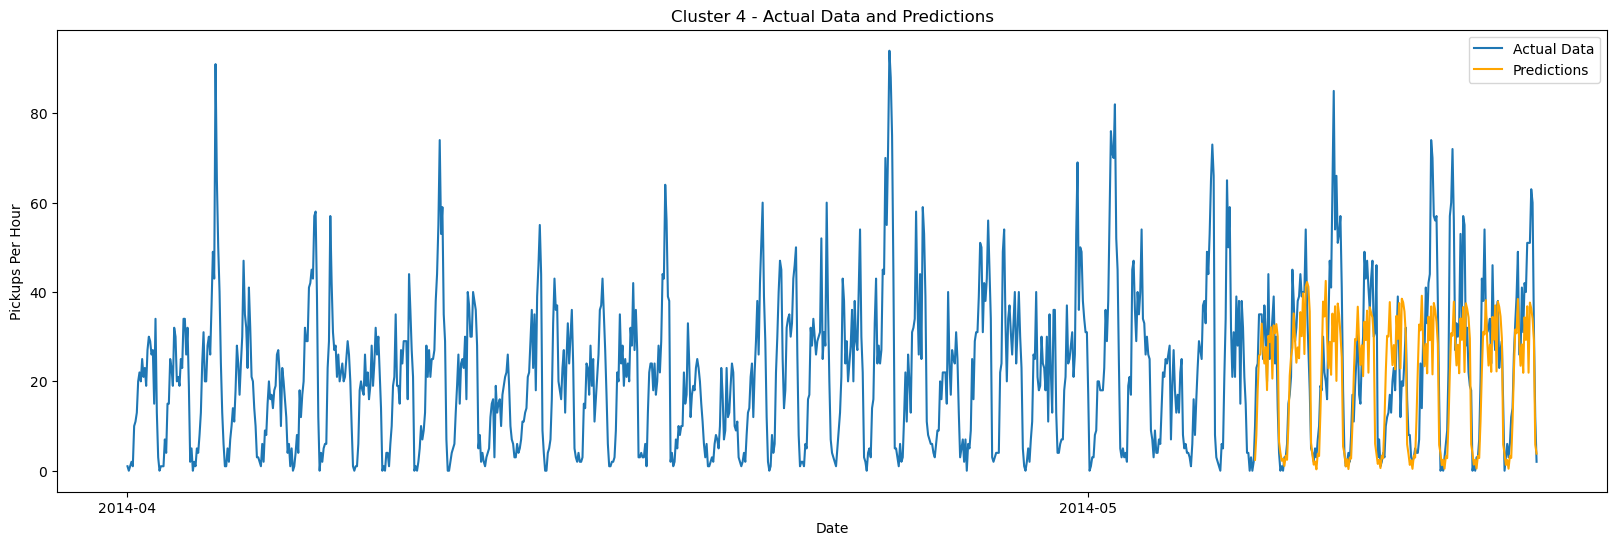

Processing cluster 5...
Mean Absolute Error for cluster 5: 1.2583709246662196
RMSE for cluster 5: 1.8326540013222699
R2 for cluster 5: -0.16413465435888974


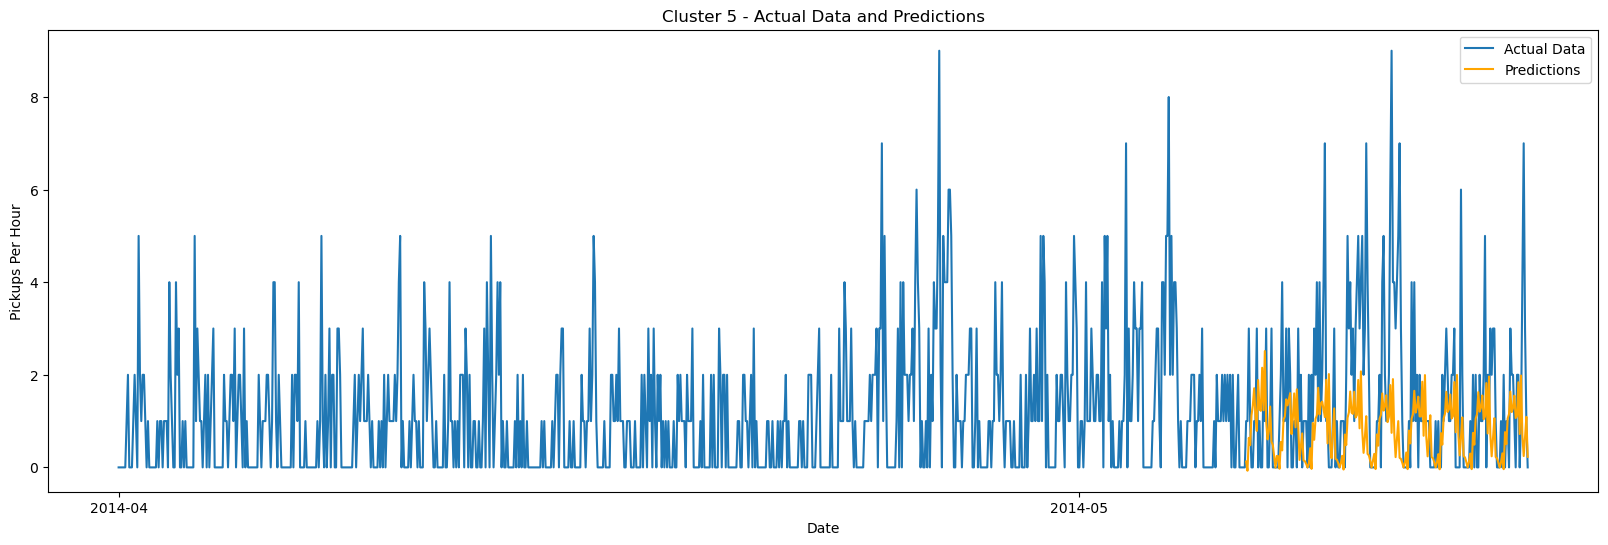

Processing cluster 6...
Mean Absolute Error for cluster 6: 116.16403366245407
RMSE for cluster 6: 163.99625029015175
R2 for cluster 6: 0.5700545988386202


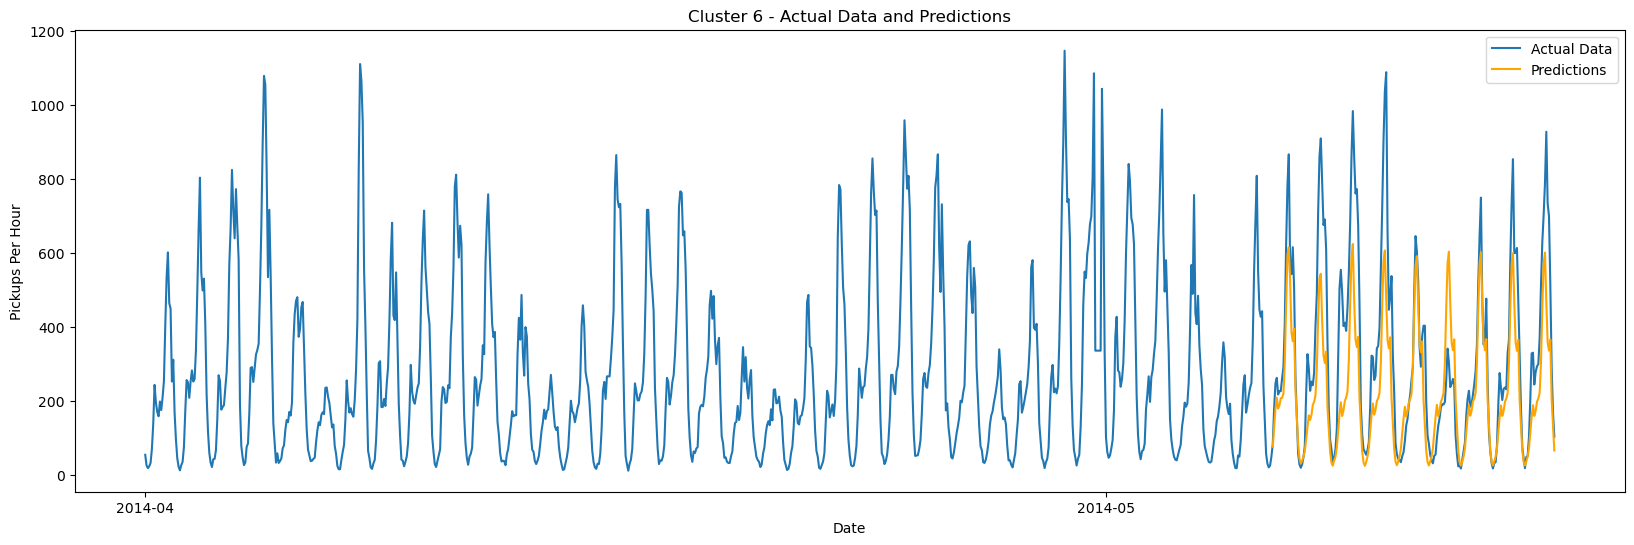

Processing cluster 7...
Mean Absolute Error for cluster 7: 2.3775691178051637
RMSE for cluster 7: 3.156679798872684
R2 for cluster 7: 0.21604732642989


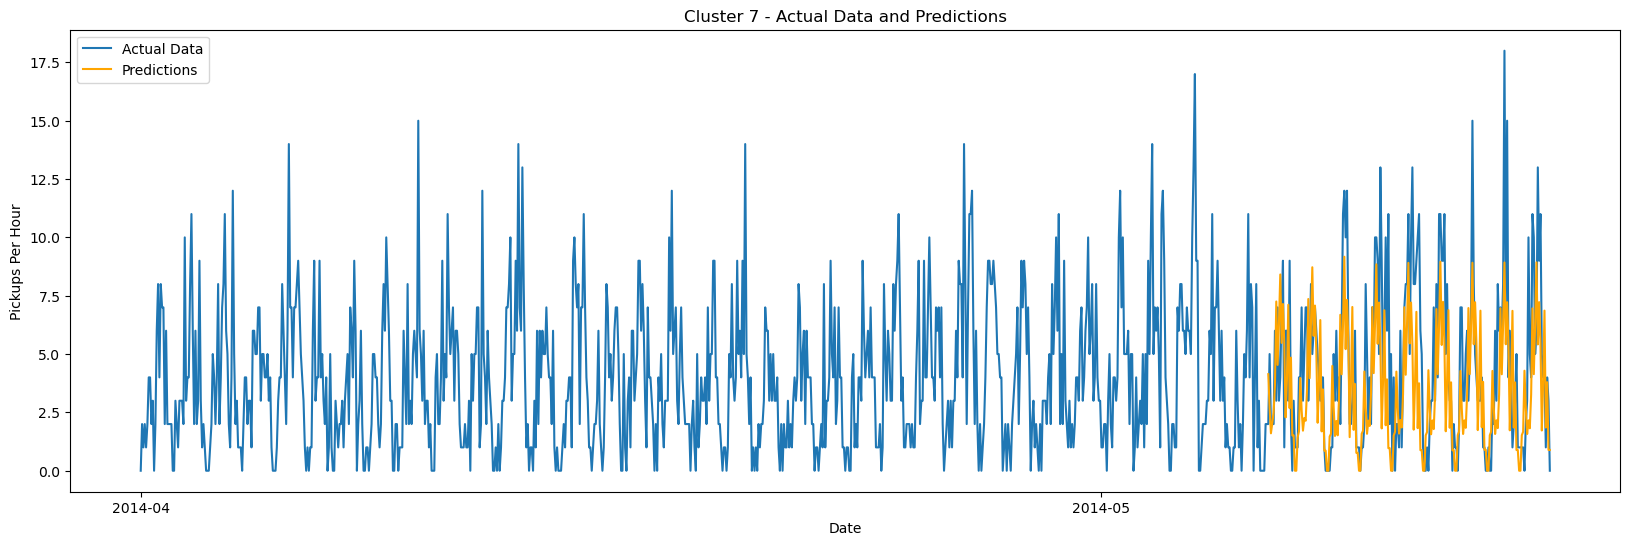

Processing cluster 8...
Mean Absolute Error for cluster 8: 16.288059465406462
RMSE for cluster 8: 23.184435529399458
R2 for cluster 8: 0.10287025251341742


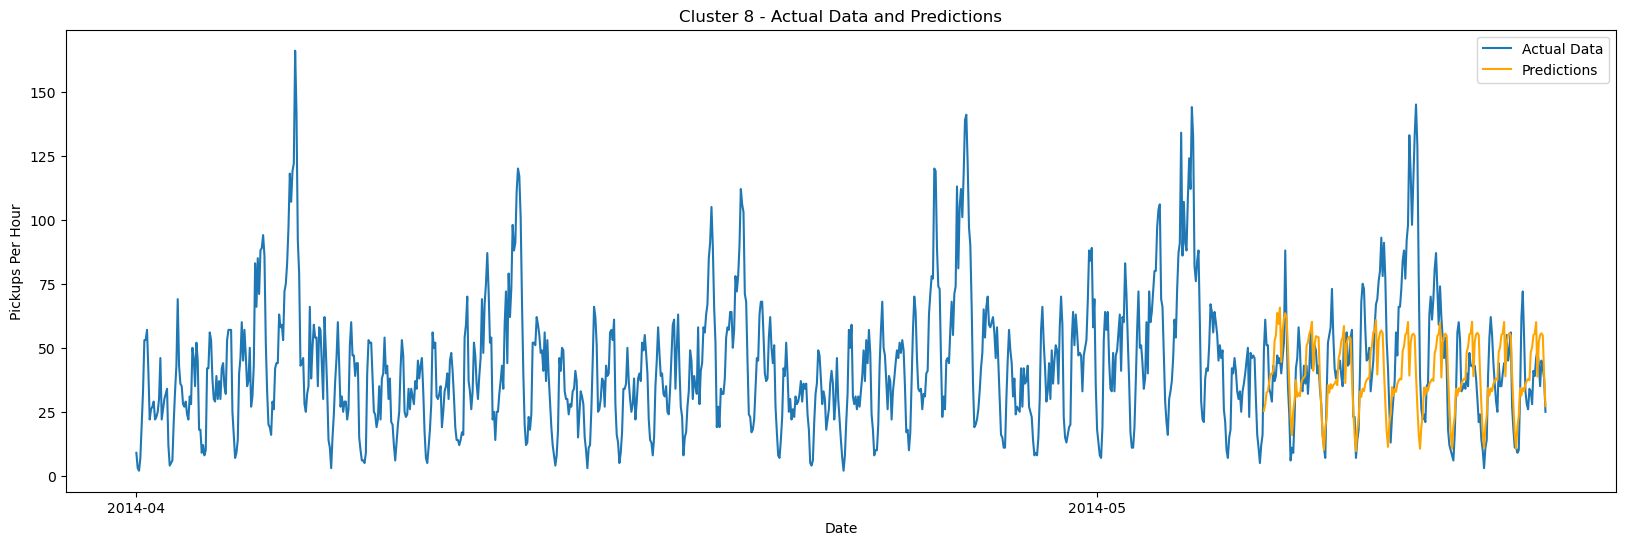

Processing cluster 9...
Mean Absolute Error for cluster 9: 98.80611526687566
RMSE for cluster 9: 138.2980978035037
R2 for cluster 9: 0.44648031946640643


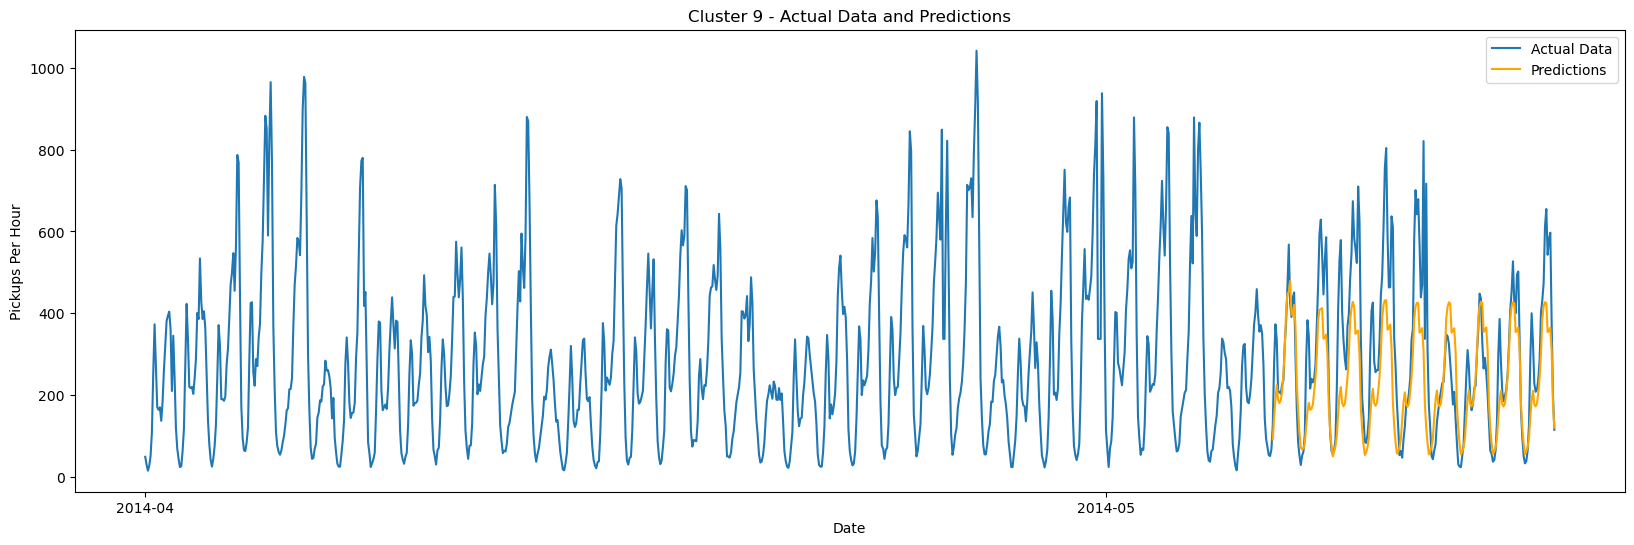

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm
from scipy.stats import boxcox

# Filter the data to include only data until May
df = df[df.index <= '2014-05-15']

overall_errors = {}

# Loop through each cluster
for cluster_num in range(10):
    print(f"Processing cluster {cluster_num}...")
    
    # Filter data for the specific cluster
    cluster_data = df[df['Cluster'] == cluster_num].copy()
    
    # Set the frequency to hourly
    cluster_data = cluster_data.asfreq('H')
    
    # Box-Cox transformation on the target variable
    cluster_data['TransformedPickups'], fitted_lambda = boxcox(cluster_data['TotalPickups'] + 1)
    
    # Split data into training and testing sets (80% - 20%)
    train_size = int(len(cluster_data) * 0.8)
    train_data, test_data = cluster_data.iloc[:train_size].copy(), cluster_data.iloc[train_size:].copy()
    
    # Selecting the model using auto_arima
    auto_arima_model = pm.auto_arima(
        train_data['TransformedPickups'],
        seasonal=True,
        m=24,
        D=1,
        start_p=1, start_q=1,
        max_p=3, max_q=3,
        start_P=0, start_Q=0,
        max_P=2, max_Q=2,
        stepwise=True,
        suppress_warnings=True,
        trace=False
    )
    
    # Extract best parameters
    order = auto_arima_model.order
    seasonal_order = auto_arima_model.seasonal_order
    
    # Fit SARIMAX model
    sarimax_model = SARIMAX(
        train_data['TransformedPickups'],
        order=order,
        seasonal_order=seasonal_order,
        enforce_stationarity=False,
        enforce_invertibility=False
    )
    model_fit = sarimax_model.fit(disp=False)
    
    # Make predictions
    pred_transformed = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)
    
    # Inverse Box-Cox transformation
    if fitted_lambda == 0:
        pred_data = np.exp(pred_transformed) - 1
    else:
        pred_data = np.exp(np.log(fitted_lambda * pred_transformed + 1) / fitted_lambda) - 1
    
    # Evaluate the model
    mae = mean_absolute_error(test_data['TotalPickups'], pred_data)
    rmse = np.sqrt(mean_squared_error(test_data['TotalPickups'], pred_data))
    r2 = r2_score(test_data['TotalPickups'], pred_data)
    
    # Store the errors for the current cluster
    overall_errors[cluster_num] = {
        'mae': mae,
        'rmse': rmse,
        'r2': r2
    }
    
    print(f"Mean Absolute Error for cluster {cluster_num}: {mae}")
    print(f"RMSE for cluster {cluster_num}: {rmse}")
    print(f"R2 for cluster {cluster_num}: {r2}")
    
    # Plot the results for the current cluster
    plt.figure(figsize=(20, 6))
    plt.plot(cluster_data.index, cluster_data['TotalPickups'], label='Actual Data')
    plt.plot(test_data.index, pred_data, label='Predictions', color='orange')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

    plt.xlabel('Date')
    plt.ylabel('Pickups Per Hour')
    plt.title(f'Cluster {cluster_num} - Actual Data and Predictions')
    plt.legend()
    plt.show()
